In [123]:

# Auto-reload external modules when their source changes
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import src.train as train
import src.models as models
import utils.helpers as helpers
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt



# Path variables
BASE_PATH = "src/inputs/"
TRAIN_PATH = BASE_PATH + "train.csv"
TEST_PATH = BASE_PATH + "test.csv"
train_jpg = glob(BASE_PATH + "train/*.jpg")
test_jpg = glob(BASE_PATH + "test/*.jpg")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
# to set the seeds for reproducibility
helpers.set_seeds()

Loading train and test csv files

In [125]:
train_df = pd.read_csv(BASE_PATH + "train.csv")
test_df =  pd.read_csv(BASE_PATH + "test.csv")


In [126]:
print("train shape:",train_df.shape)
print("test shape",test_df.shape)


train shape: (9912, 14)
test shape (8, 13)


In [127]:
train_df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72

In [128]:
test_df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  4128bae22183829d2b5fea10effdb0c3              1     0     1     0       0   
1  43a2262d7738e3d420d453815151079e              0     1     0     0       0   
2  4e429cead1848a298432a0acad014c9d              0     0     0     1       0   
3  80bc3ccafcc51b66303c2c263aa38486              1     0     1     0       0   
4  8f49844c382931444e68dffbe20228f4              1     1     1     0       1   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  
0          1      1        0      0          1     0     1  
1          0      1        1      0          0     0     0  
2          1      1        1      0          1     1     1  
3          0      0        0      0          0     1     0  
4          1      0        1      0          1     1     0

The train.csv and test.csv files contain metadata for photos in the training set and test set, respectively. Each pet photo is labeled with the value of 1 (Yes) or 0 (No) for each of the following features:

Focus - Pet stands out against uncluttered background, not too close / far.  
Eyes - Both eyes are facing front or near-front, with at least 1 eye / pupil decently clear.  
Face - Decently clear face, facing front or near-front.  
Near - Single pet taking up significant portion of photo (roughly over 50% of photo width or height).  
Action - Pet in the middle of an action (e.g., jumping).  
Accessory - Accompanying physical or digital accessory / prop (i.e. toy, digital sticker), excluding collar and leash.  
Group - More than 1 pet in the photo.  
Collage - Digitally-retouched photo (i.e. with digital photo frame, combination of multiple photos).  
Human - Human in the photo.  
Occlusion - Specific undesirable objects blocking part of the pet (i.e. human, cage or fence). Note that not all blocking objects are considered occlusion.  
Info - Custom-added text or labels (i.e. pet name, description).  
Blur - Noticeably out of focus or noisy, especially for the pet’s eyes and face. For Blur entries, “Eyes” column is always set to 0.  

In [129]:
print("Null Values: ",train_df.isnull().sum())
print("Duplicate Values: ",train_df.duplicated().sum())

Null Values:  Id               0
Subject Focus    0
Eyes             0
Face             0
Near             0
Action           0
Accessory        0
Group            0
Collage          0
Human            0
Occlusion        0
Info             0
Blur             0
Pawpularity      0
dtype: int64
Duplicate Values:  0


In [130]:
print("Null Values: ",test_df.isnull().sum())
print("Duplicate Values: ",test_df.duplicated().sum())

Null Values:  Id               0
Subject Focus    0
Eyes             0
Face             0
Near             0
Action           0
Accessory        0
Group            0
Collage          0
Human            0
Occlusion        0
Info             0
Blur             0
dtype: int64
Duplicate Values:  0


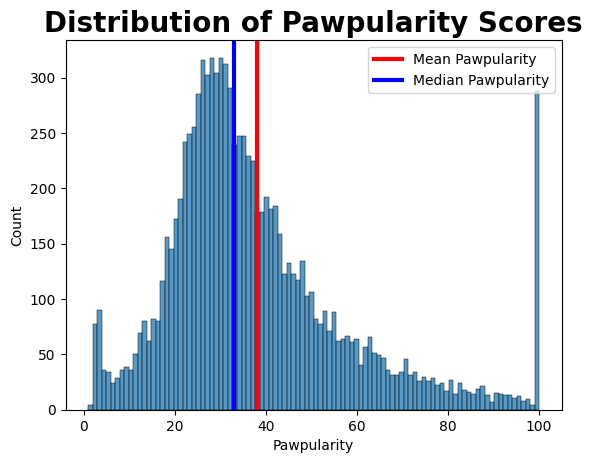

The mean Pawpularity score is 38.03904358353511
The median Pawpularity score is 33.0
The standard deviation of the Pawpularity score is 20.59199010577444
There are 100 unique values of Pawpularity score


In [131]:
#To check the distribution of Pawpularity Scores

helpers.plotDistribution(train_df)

print(f"The mean Pawpularity score is {train_df['Pawpularity'].mean()}")
print(f"The median Pawpularity score is {train_df['Pawpularity'].median()}")
print(f"The standard deviation of the Pawpularity score is {train_df['Pawpularity'].std()}")
print(f"There are {len(train_df['Pawpularity'].unique())} unique values of Pawpularity score")


> From the distribution graph above, we can see that pets with Pawpularity score 20 to 40 are more, Also there is a high peak at 100 score, but before that most of the pets have the score from around ~60 - ~90 .  

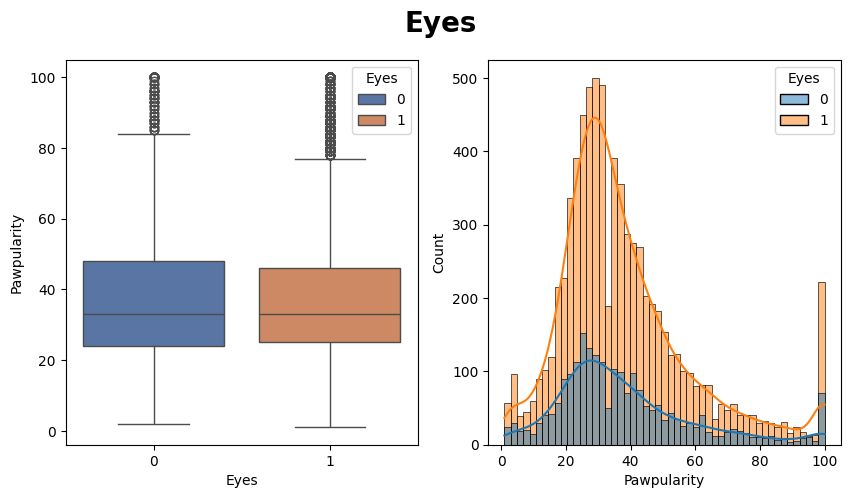

In [132]:
#showing one feature with the Pawpularity
helpers.plotDistributionAcrossEachFeature(["Eyes"],train_df)

> For the single feature like "Eye", both categories "0", "1" are similar as shown in the box plot, However we can see that those with high pawpularity are mostly the pets facing front or near-front, with at least 1 eye / pupil decently clear. 

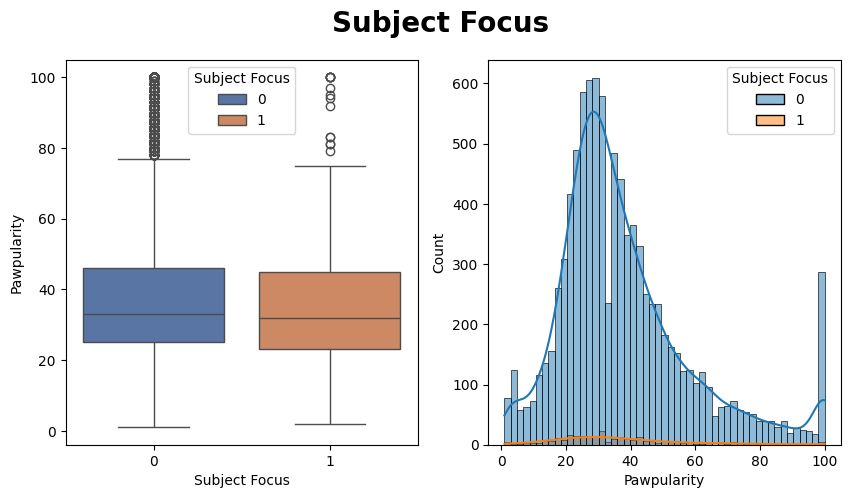

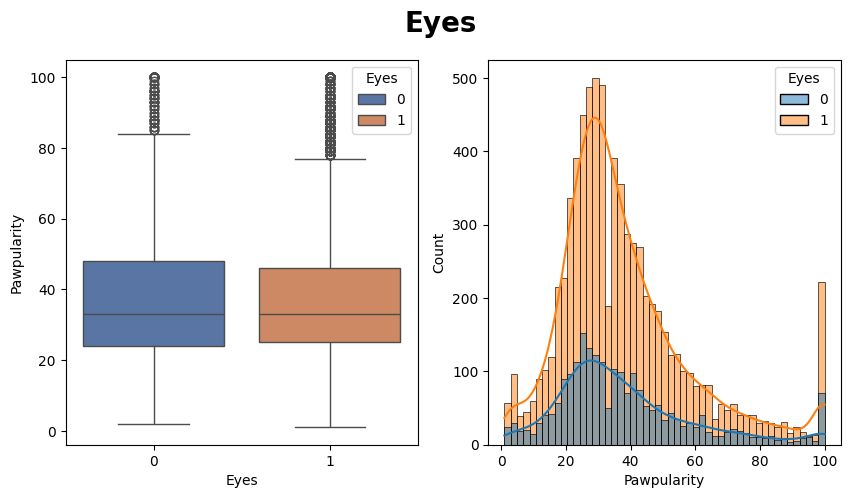

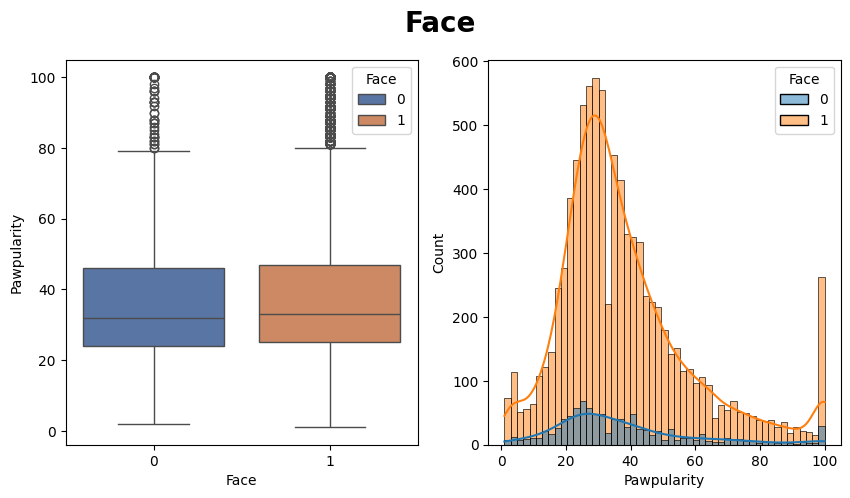

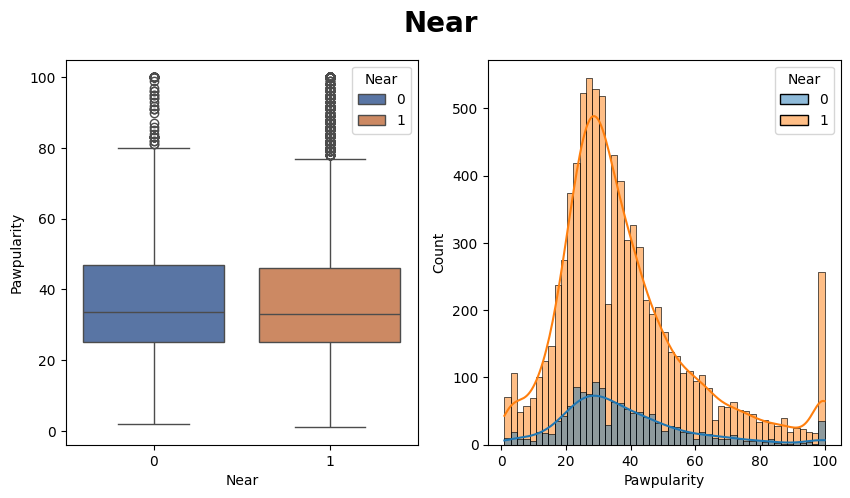

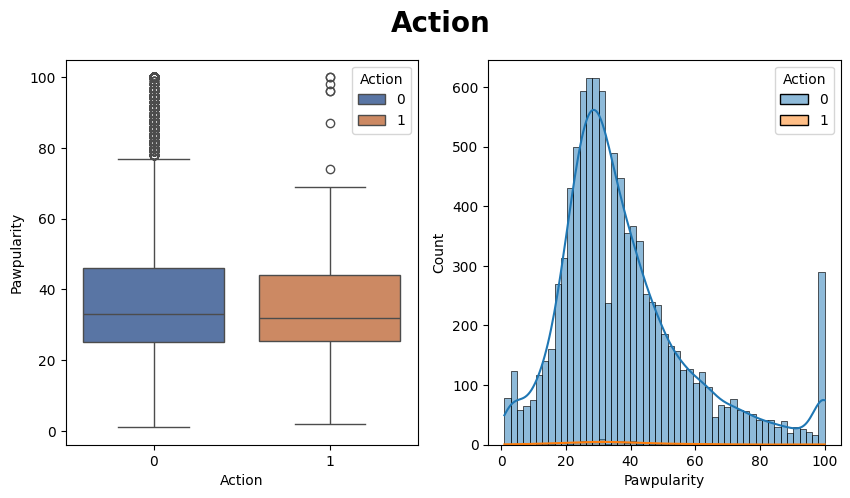

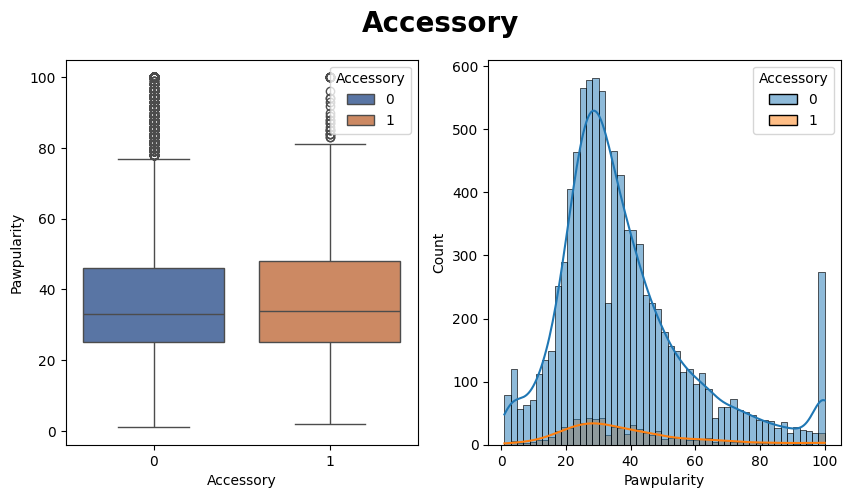

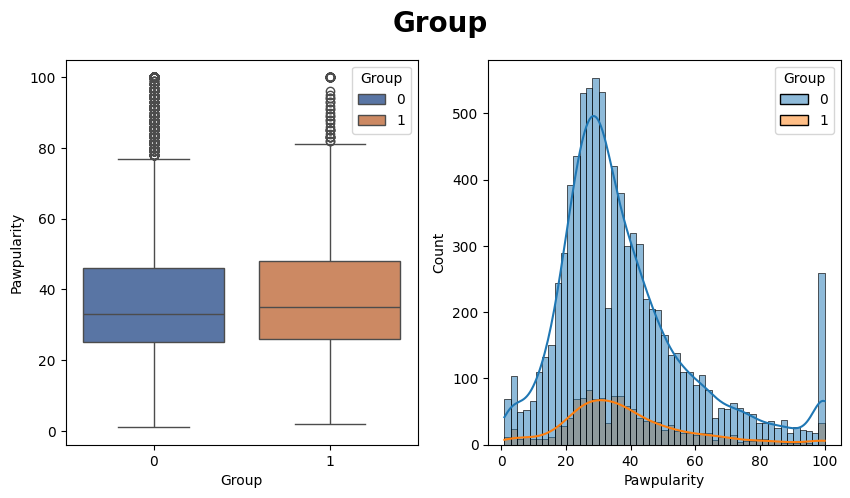

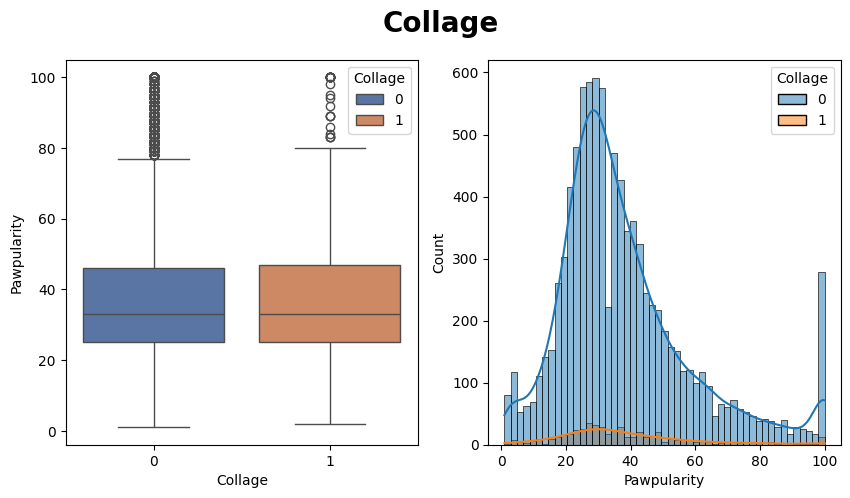

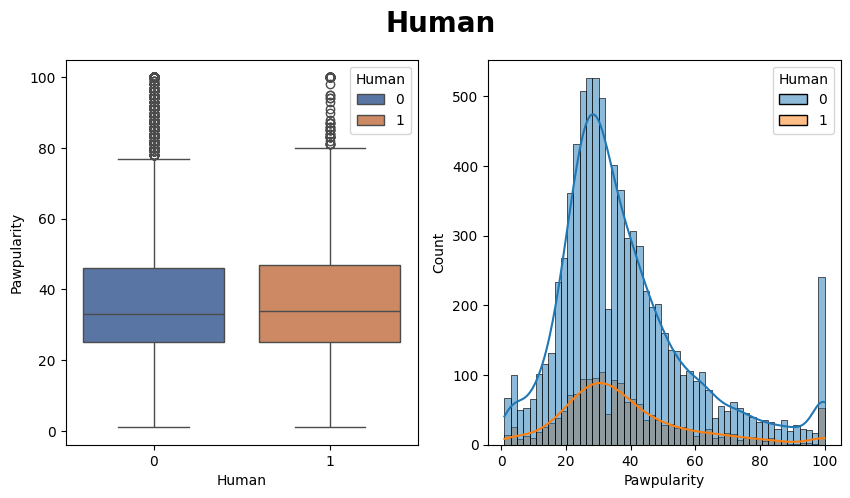

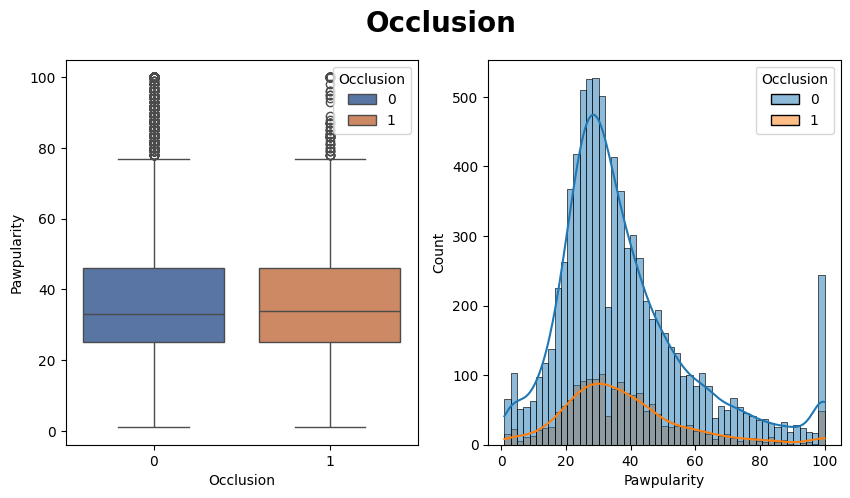

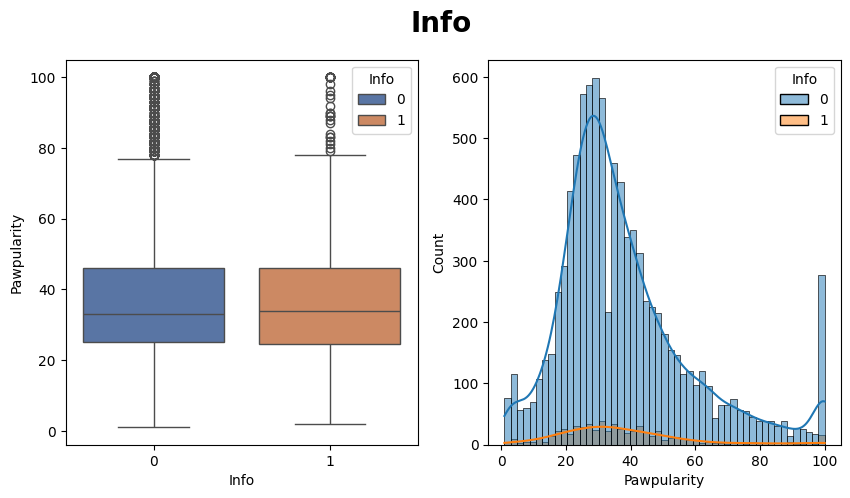

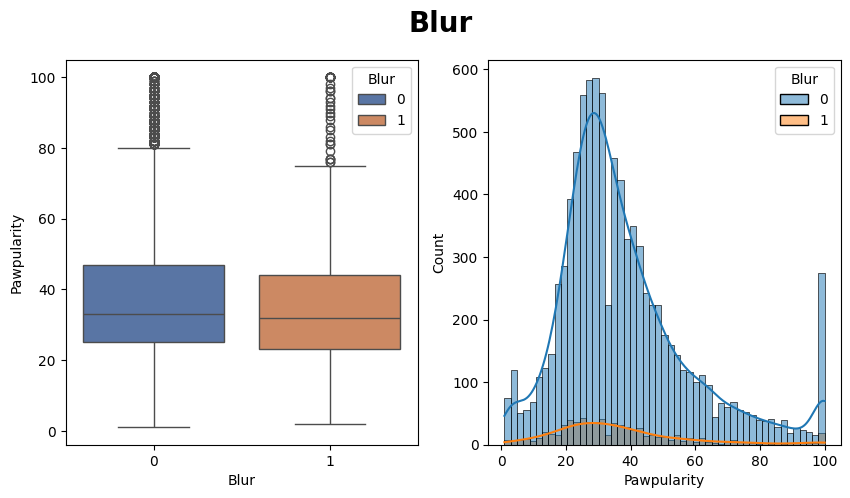

In [133]:
# Let's all features
feature_variables = train_df.columns.values.tolist()[1:-1] #to exclude id and Pawpularity
helpers.plotDistributionAcrossEachFeature(feature_variables,train_df)

### Feedback 1
(Assignment: Add the correlation matrix and VIF calculation code to your notebook, and make sure to include explanatory comments.)

> Looking at the above distribtions, we can see the usually the pets with less blur, no object or human inclusion, without frame and tools, near are labelled with high score, Now let's if there is any correlation between the feature and pawpularity as well as multicollinearity which describe if the features are correlated with each other (we can use correlation matrix and VIF- Variance Inflation Factor )

1. Correlation Matrix shows the how two variable are related/affected by each other
2. VIF describes how one variable is related with all other input features

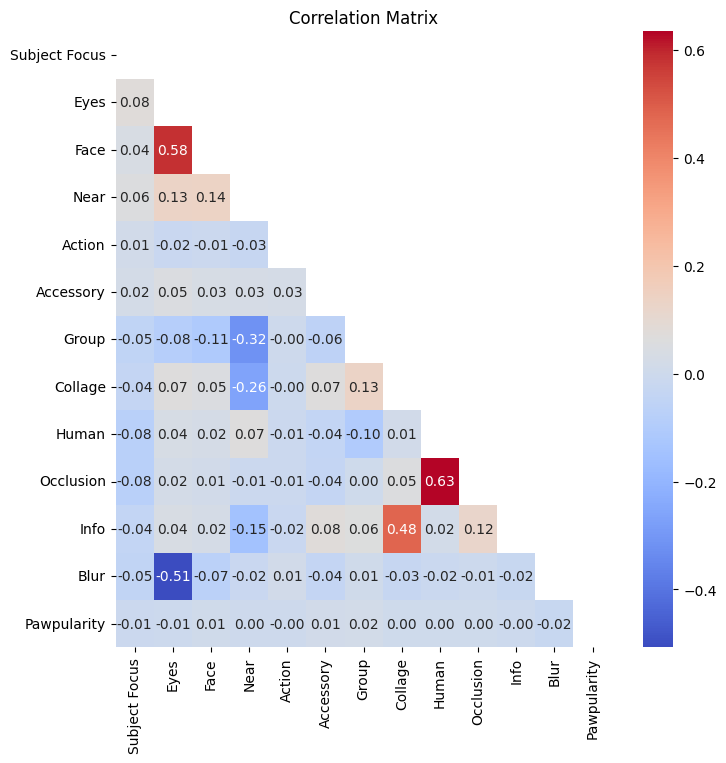

Subject Focus   -0.009853
Eyes            -0.006686
Face             0.008018
Near             0.001001
Action          -0.001373
Accessory        0.013287
Group            0.016469
Collage          0.001732
Human            0.003983
Occlusion        0.001979
Info            -0.004735
Blur            -0.023540
Name: Pawpularity, dtype: float64


In [134]:

helpers.plotCorrelationMatrix(train_df)


> Here we can see that there is not much significance correlation between the feature and pawpuarlity, However there is some correlation between the input features like Face and Eyes, Human and Occlusion.

>   The first between Occlusion and Human (Humans can hide part of the animal)
The second between Face and Eyes which means If the face is clear and front-facing, chances are both eyes are also visible and clear. 

In [135]:
helpers.calculateVIF(train_df.loc[:, ~train_df.columns.isin(["Id", "Pawpularity"])])

feature        VIF
2            Face  13.715668
1            Eyes  10.118170
3            Near   5.762924
9       Occlusion   2.073562
8           Human   2.064939
11           Blur   1.595109
7         Collage   1.452023
10           Info   1.412621
6           Group   1.163850
5       Accessory   1.090942
0   Subject Focus   1.048292
4          Action   1.010174

> #### Here we can see that Face and Eyes are high correclated, which signal to use some regularization when we apply model on meta data

### Now let's explore images

2. [To access directly Feedback 2](#feedback-2)

In [136]:
id_stem = Path(train_jpg[0]).stem
print('Original: ', train_jpg[0])
print('After: ', id_stem)


Original:  src/inputs/train\0007de18844b0dbbb5e1f607da0606e0.jpg
After:  0007de18844b0dbbb5e1f607da0606e0


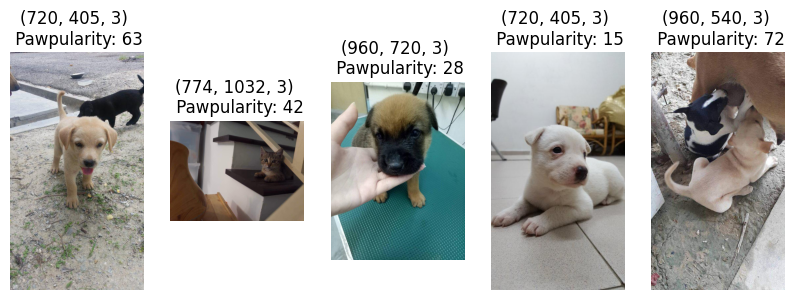

In [137]:
#let's see first 5 images
helpers.showPicture(5, train_jpg, train_df)

In [138]:
#Let's see the lowest and highest score images
print(train_df["Pawpularity"].max())
print(train_df["Pawpularity"].min())


100
1


In [139]:
train_df_max_id =  train_df.loc[train_df["Pawpularity"] == train_df["Pawpularity"].max(),"Id"].iloc[0]
train_df_min_id =  train_df.loc[train_df["Pawpularity"] == train_df["Pawpularity"].min(),"Id"].iloc[0]

In [140]:
filtered_jpg = [p for p in train_jpg if Path(p).stem in [train_df_max_id,train_df_min_id]]

##### let's check the high Pawpularity and low Pawpularity images

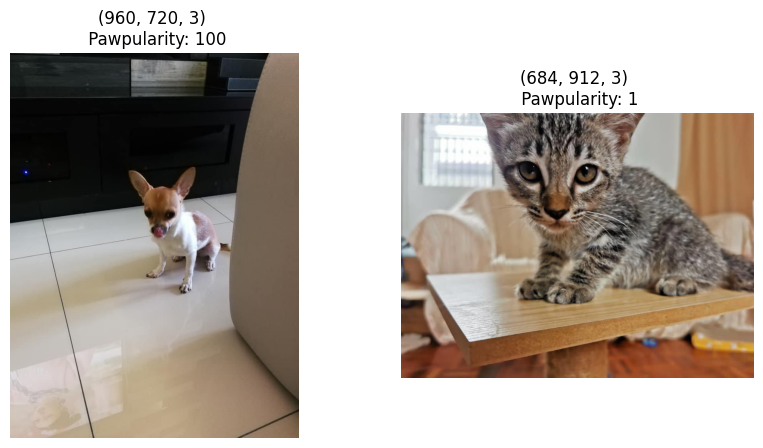

In [141]:
helpers.showPicture(2, filtered_jpg, train_df)

In [142]:
train_df

Id  Subject Focus  Eyes  Face  Near  \
0     0007de18844b0dbbb5e1f607da0606e0              0     1     1     1   
1     0009c66b9439883ba2750fb825e1d7db              0     1     1     0   
2     0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1   
3     0018df346ac9c1d8413cfcc888ca8246              0     1     1     1   
4     001dc955e10590d3ca4673f034feeef2              0     0     0     1   
...                                ...            ...   ...   ...   ...   
9907  ffbfa0383c34dc513c95560d6e1fdb57              0     0     0     1   
9908  ffcc8532d76436fc79e50eb2e5238e45              0     1     1     1   
9909  ffdf2e8673a1da6fb80342fa3b119a20              0     1     1     1   
9910  fff19e2ce11718548fa1c5d039a5192a              0     1     1     1   
9911  fff8e47c766799c9e12f3cb3d66ad228              0     1     1     1   

      Action  Accessory  Group  Collage  Human  Occlusion  Info  Blur  \
0          0          0      1        0      0          0     0     0   
1          0          0      0        0      0          0     0     0   
2          0          0      0        0      1          1     0     0   
3          0          0      0        0      0          0     0     0   
4          0          0      1        0      0          0     0     0   
...      ...        ...    ...      ...    ...        ...   ...   ...   
9907       0          0      0        0      0          0     0     1   
9908       0          0      0        0      0          0     0     0   
9909       0          0      0        0      1          1     0     0   
9910       0          0      0        0      1          0     0     0   
9911       0          0      0        0      0          0     0     0   

      Pawpularity  
0              63  
1              42  
2              28  
3              15  
4              72  
...           ...  
9907           15  
9908           70  
9909           20  
9910           20  
9911           30  

[9912 rows x 14 columns]

<br>



### Feedback 2
 (Add the code for computing image features(Brightness, Contrast, saturation, sharpness, edge density, resolution, aspect ration) and visualizing their relationship with the target to your notebook, and include explanatory comments)

> Now we will check some other pattern from image and will their correlation with target pawpularity 

In [149]:
len(train_df)

9912

In [150]:
# adding the image path to the metadata table
train_df['path'] = train_df['Id'].map(lambda x:str(BASE_PATH+'train/'+x)+'.jpg')
# this function will calculate edges, brightness,contrast etc for each image 
features_list = helpers.extractFeature(train_df)
print(len(features_list))


9912


In [151]:
img_features_df = pd.DataFrame(features_list)

# Merging with metadata table
merged_df = train_df.merge(img_features_df, on='Id')

print(len(merged_df))

9912


In [152]:
merged_df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  ...  Pawpularity  \
0          0      1        0      0  ...           63   
1          0      0        0      0  ...           42   
2          0      0        0      1  ...           28   
3          0      0        0      0  ...           15   
4          0      1        0      0  ...           72   

                                                    path  brightness  \
0  src/inputs/train/0007de18844b0dbbb5e1f607da0606e0.jpg  149.636001   
1  src/inputs/train/0009c66b9439883ba2750fb825e1d7db.jpg   95.569681   
2  src/inputs/train/0013fd999caf9a3efe1352ca1b0d937e.jpg  117.427021   
3  src/inputs/train/0018df346ac9c1d8413cfcc888ca8246.jpg  156.972733   
4  src/inputs/train/001dc955e10590d3ca4673f034feeef2.jpg  129.294448   

    contrast  saturation    sharpness  edge_density  width  height  \
0  47.226252   26.977051  4434.230369      0.221547    405     720   
1  55.386129   65.260191    28.845254      0.009222   1032     774   
2  58.077102  100.025308   151.709166      0.037694    720     960   
3  50.189218   27.387541   418.406313      0.028875    405     720   
4  54.795065   35.232224  2241.652292      0.156723    540     960   

   aspect_ratio  
0      0.562500  
1      1.333333  
2      0.750000  
3      0.562500  
4      0.562500  

[5 rows x 23 columns]

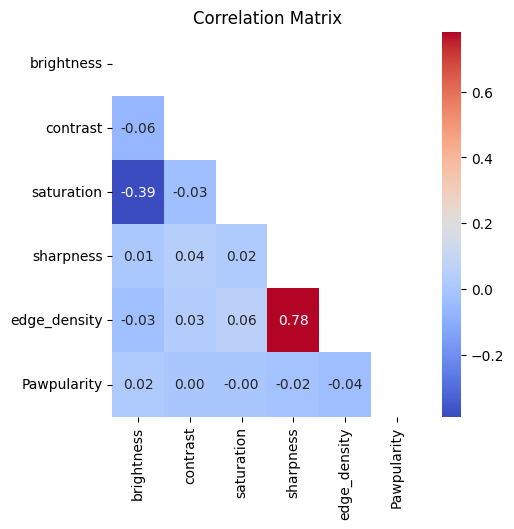

brightness      0.017841
contrast        0.001438
saturation     -0.003212
sharpness      -0.020849
edge_density   -0.036936
Name: Pawpularity, dtype: float64


In [155]:

added_features = ['Id','brightness', 'contrast', 'saturation', 'sharpness', 'edge_density','Pawpularity']
helpers.plotCorrelationMatrix(merged_df[added_features],figsize=(5,5))

> None of these individual image features have a strong  correlation with Pawpularity. 